In [2]:
#auto Sensor detection

In [40]:
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import autograd as ag
import autograd.numpy as np
import scipy.linalg as la
import scipy.signal as sp
import scipy.stats as st
import scipy.integrate as itg
import math
from scipy import integrate
%matplotlib inline

In [41]:
x0=np.array([-1.42272315,1.66878427,-7.02389097])
#Assume a driver does 5 moves 
n_u=5
#u=(np.random.rand(n_u,2)-np.array([0,0.5]))* np.array([2,1])
u=np.array([[1.49609465,0.24219884],
 [0.92401463,0.45875257],
 [0.10876148,0.43543185],
 [1.97321445,0.46318528],
 [0.49352292,0.38270178]])
#set every move is equal to 20 unit time
num=20
U=np.repeat(u, 20, axis=0)
#add noise
total=n_u*num
Wp=0.0001 * np.random.randn(total, 3)
#print(U)

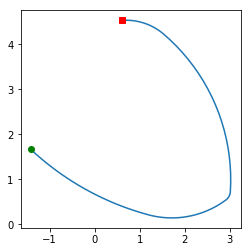

In [42]:
list=[(x0)]
temp=(x0)
for k in range(total):
    temp=temp+([0.1*U[k][0]*np.cos(temp[2]),0.1*U[k][0]*np.sin(temp[2]),0.1*U[k][1]])+(Wp[k])
    list.append(temp)
X_car=np.array(list)
plt.plot(X_car[:,0],X_car[:,1])
plt.plot(X_car[0,0],X_car[0,1],'go')
plt.plot(X_car[-1,0],X_car[-1,1],'rs')
plt.gca().set_aspect('equal')

In [43]:
SensorLocs=np.array([[0,0]])
tempX1=np.array([-7,-5,-1,1,5,7,])
tempX2=np.array([-8,-4,-2,2,4,8])
tempY1=np.sqrt(3)*np.array([-5,-3,-1,1,3,5])
tempY2=np.sqrt(3)*np.array([-4,-2,0,2,4])
X1, Y1=np.meshgrid(tempX1, tempY1)
X2, Y2=np.meshgrid(tempX2, tempY2)
for i,P1 in enumerate(X1):
    for j,P2 in enumerate(P1):
        SensorLocs=np.append(SensorLocs,np.array([[P2,Y1[i][j]]]),axis=0)
for i,P1 in enumerate(X2):
    for j,P2 in enumerate(P1):
        SensorLocs=np.append(SensorLocs,np.array([[P2,Y2[i][j]]]),axis=0)
    
SensorLocs=np.delete(SensorLocs, 0, 0)
Sen_num=len(SensorLocs)

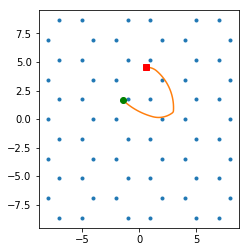

In [44]:
#Sen_num=len(range(-2, 5, 2))*len((0, 5, 2))
#SensorLocs =np.zeros(shape=(Sen_num,2))
#i=0
#for xx in range(-2, 5, 2):
#    for yy in range(0, 5, 2) :
#        SensorLocs[i,0]=xx
#        SensorLocs[i,1]=yy
#        i=i+1
        
#print(SensorLocs)
#print(a)
# Each row of SensorStr is the x-y coordinate of a sensor
plt.plot(SensorLocs[:,0],SensorLocs[:,1],'.')
plt.plot(X_car[:,0],X_car[:,1])
plt.plot(X_car[0,0],X_car[0,1],'go')
plt.plot(X_car[-1,0],X_car[-1,1],'rs')
plt.gca().set_aspect('equal')



In [45]:
#Assumne 1 unit of distance is 20m
#Consider the only Pathloss
#Carrier Freq fc= 2.5Ghz
def SimplePathloss(d,Pt):
    fc=2.5*10**9
    c=299792458
    lamda=c/fc
    Pr=Pt*((4*np.pi*d*20)/(1*lamda))**-2
    return Pr

In [46]:
delta = 0.07
Pt=5
x = np.arange(-8, 8, delta)
y = np.arange(-8, 8, delta)
X, Y = np.meshgrid(x, y)
Pr=np.zeros_like(X)
for Pos in SensorLocs:
    temp=(X-Pos[0])**2+(Y-Pos[1])**2
    d=np.sqrt(temp)
    Pr=Pr+SimplePathloss(d,Pt)
    #print(Pr)


In [47]:
#db-lized
Prdb=10*np.log10(Pr)
#print(Prdb)

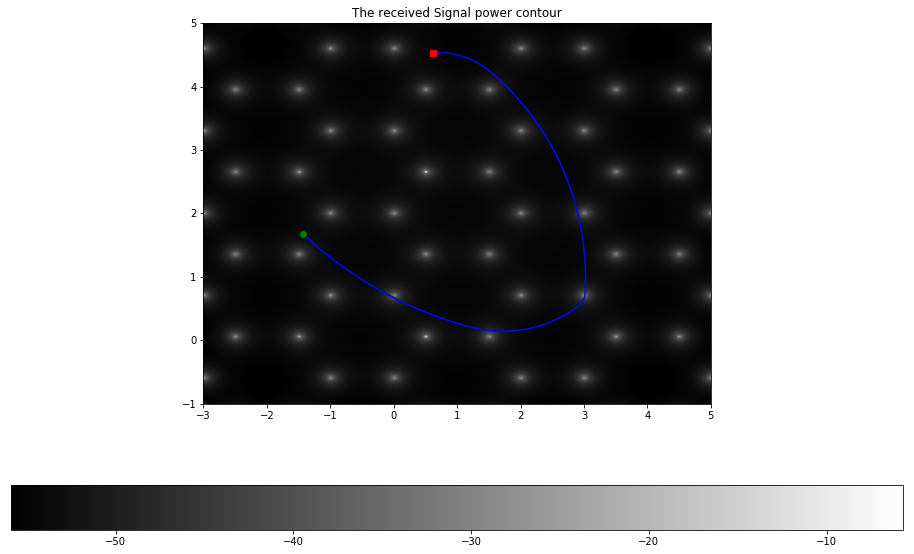

In [48]:
fig, ax = plt.subplots(figsize=(20,10))
im = ax.imshow(Prdb, interpolation='bilinear', origin='lower',
                cmap=cm.gray, extent=(-3, 5, -1, 5))
levels = np.arange(np.min(Prdb), np.max(Prdb), (np.max(Prdb)-np.min(Prdb))/10)
#CS = ax.contour(Prdb, levels, origin='lower', cmap='flag',
#                linewidths=2, extent=(-3, 4, -1, 5))

# Thicken the zero contour.
#zc = CS.collections[6]
#plt.setp(zc, linewidth=1)

#ax.clabel(CS, levels[1::2],  # label every second level
          #inline=1, fmt='%1.1f', fontsize=14)

# make a colorbar for the contour lines
#CB = fig.colorbar(CS, shrink=0.7, extend='both')

ax.set_title('The received Signal power contour')

# We can still add a colorbar for the image, too.
CBI = fig.colorbar(im, orientation='horizontal', shrink=0.8)

# This makes the original colorbar look a bit out of place,
# so let's improve its position.

#l, b, w, h = ax.get_position().bounds
#ll, bb, ww, hh = CB.ax.get_position().bounds
#CB.ax.set_position([ll, b + 0.1*h, ww, h*0.8])

plt.plot(X_car[:,0],X_car[:,1],'b')
plt.plot(X_car[0,0],X_car[0,1],'go')
plt.plot(X_car[-1,0],X_car[-1,1],'rs')
plt.gca().set_aspect('equal')
plt.show()


In [49]:
#After we combine the Pathloss and shaodowing
#Based on the Table 2.4 and Table 2.2 choose offc
r=3
Psi=8 
d0=10
for Pos in SensorLocs:
    temp=(X-Pos[0])**2+(Y-Pos[1])**2
    d=np.sqrt(temp)
    Pr=Pr+SimplePathloss(d,Pt)*(d0/d)**r
#db-lized
Pr_shadow_db=10*np.log10(Pr)
print(Pr_shadow_db)

[[-28.92580223 -28.53207911 -28.10141248 ... -27.82867802 -28.29220419
  -28.70380955]
 [-28.13895161 -27.89491786 -27.65627304 ... -27.51144822 -27.75964648
  -27.9973192 ]
 [-27.06095356 -26.9358323  -26.86121753 ... -26.8309789  -26.8886104
  -26.98193121]
 ...
 [-26.31774405 -26.24610543 -26.25041373 ... -26.27738389 -26.24073235
  -26.26630469]
 [-27.55824519 -27.38618322 -27.24525729 ... -27.16803707 -27.30352775
  -27.45467789]
 [-28.51186544 -28.20707931 -27.88890165 ... -27.69035715 -28.02866574
  -28.33778712]]


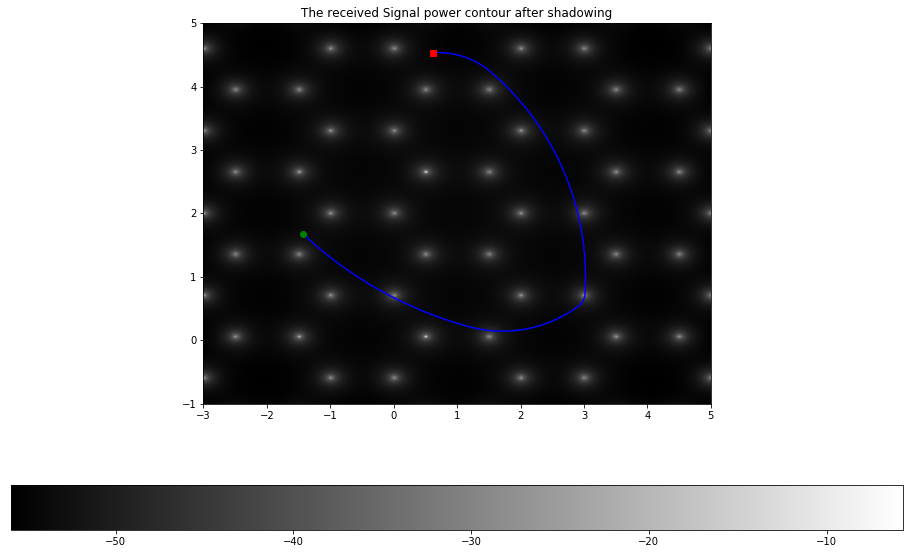

In [50]:
fig, ax = plt.subplots(figsize=(20,10))
im = ax.imshow(Prdb, interpolation='bilinear', origin='lower',
                cmap=cm.gray, extent=(-3, 5, -1, 5))
levels = np.arange(np.min(Prdb), np.max(Prdb), (np.max(Prdb)-np.min(Prdb))/10)
#CS = ax.contour(Prdb, levels, origin='lower', cmap='flag',
#                linewidths=2, extent=(-3, 4, -1, 5))

# Thicken the zero contour.
#zc = CS.collections[6]
#plt.setp(zc, linewidth=1)

#ax.clabel(CS, levels[1::2],  # label every second level
          #inline=1, fmt='%1.1f', fontsize=14)

# make a colorbar for the contour lines
#CB = fig.colorbar(CS, shrink=0.7, extend='both')

ax.set_title('The received Signal power contour after shadowing')

# We can still add a colorbar for the image, too.
CBI = fig.colorbar(im, orientation='horizontal', shrink=0.8)

# This makes the original colorbar look a bit out of place,
# so let's improve its position.

#l, b, w, h = ax.get_position().bounds
#ll, bb, ww, hh = CB.ax.get_position().bounds
#CB.ax.set_position([ll, b + 0.1*h, ww, h*0.8])

plt.plot(X_car[:,0],X_car[:,1],'b')
plt.plot(X_car[0,0],X_car[0,1],'go')
plt.plot(X_car[-1,0],X_car[-1,1],'rs')
plt.gca().set_aspect('equal')
plt.show()

In [51]:

#Assumne 1 unit of distance is 50m
#Consider the only Pathloss
#Carrier Freq fc= 2.5Ghz
sigma=6#dB

def Simpleprobability(d,Pt,P0):
    fc=2.5*10**9
    c=299792458
    lamda=c/fc
    Pr=Pt*((4*np.pi*d*50)/(1*lamda))**-2
    Pdbm=10*np.log10(Pr)+30
    OutP=1-0.5*qfunc.erfc((P0-Pdbm)/sigma/np.sqrt(2))
    #print(Pdbm)
    return OutP

In [52]:
#example .2 calculate the outage probabilit
P0=-50#dBm
from scipy import special as qfunc
Pout=np.ones_like(X)
for Pos in SensorLocs:
    temp=(X-Pos[0])**2+(Y-Pos[1])**2
    d=np.sqrt(temp)
    Pout=Pout*Simpleprobability(d,Pt,P0)
    

#print(1-Pout)

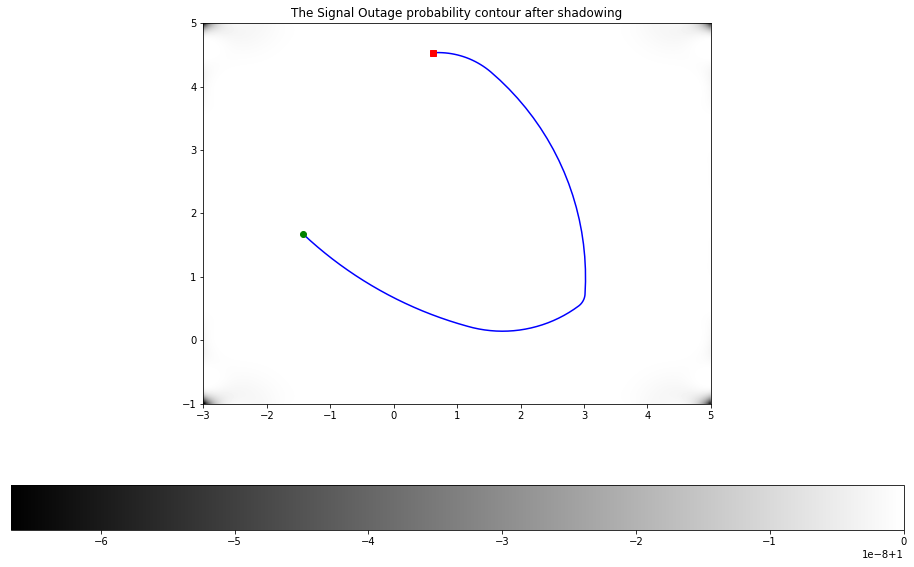

In [53]:
fig, ax = plt.subplots(figsize=(20,10))
im = ax.imshow(1-Pout, interpolation='bilinear', origin='lower',
                cmap=cm.gray, extent=(-3, 5, -1, 5))
levels = np.arange(np.min(1-Pout), np.max(1-Pout), (np.max(1-Pout)-np.min(1-Pout))/10)
#CS = ax.contour(1-Pout, levels, origin='lower', cmap='flag',
#                linewidths=2, extent=(-3, 5, -1, 5))

# Thicken the zero contour.
#zc = CS.collections[6]
#plt.setp(zc, linewidth=1)

#ax.clabel(CS, levels[1::2],  # label every second level
          #inline=1, fmt='%1.1f', fontsize=14)

# make a colorbar for the contour lines
#CB = fig.colorbar(CS, shrink=0.7, extend='both')

ax.set_title('The Signal Outage probability contour after shadowing')

# We can still add a colorbar for the image, too.
CBI = fig.colorbar(im, orientation='horizontal', shrink=0.8)

# This makes the original colorbar look a bit out of place,
# so let's improve its position.

#l, b, w, h = ax.get_position().bounds
#ll, bb, ww, hh = CB.ax.get_position().bounds
#CB.ax.set_position([ll, b + 0.1*h, ww, h*0.8])

plt.plot(X_car[:,0],X_car[:,1],'b')
plt.plot(X_car[0,0],X_car[0,1],'go')
plt.plot(X_car[-1,0],X_car[-1,1],'rs')
plt.gca().set_aspect('equal')
plt.show()

In [54]:
delta = 0.07
Pt=10
x = np.arange(-8, 8, delta)
y = np.arange(-8, 8, delta)
X, Y = np.meshgrid(x, y)
Pr=np.zeros_like(X)
for Pos in SensorLocs:
    temp=(X-Pos[0])**2+(Y-Pos[1])**2
    d=np.sqrt(temp)
    Pr=Pr+SimplePathloss(d,Pt)

In [55]:
# When In AWGN channel with Rayleigh Fading
#Assumne 1 unit of distance is 30m
#Consider the only Pathloss
#Carrier Freq fc= 2.5Ghz
#sigma=6#dB
Pout3=np.ones_like(Pout)
def integrand(x, Pr):
    return (1/Pr)*np.exp(-x/Pr)


def Rayleighprobability(d,Pt,P0dbm):
    P=np.zeros_like(d)
    fc=2.5*10**9
    c=299792458
    lamda=c/fc
    
    Pr=Pt*((4*np.pi*d*30)/(1*lamda))**-2
    
    #Pdbm=10*np.log10(Pr)+30
    #print(Pdbm)
    Li=Pr.reshape(Pr.size,1)
    outP=np.zeros_like(Li)
    P0=10**(P0dbm/10-3)
    
    for i in range(len(Li)):
        outP[i],err = integrate.quad(integrand, 0, P0, args=(Li[i]) )
    #print(d.shape)
    
    out=outP.reshape(d.shape)
    return out
    

In [56]:
#example 3.2 calculate the outage probabilit
P0dbm=-45#dBm
from scipy import special as qfunc
Pout3=np.ones_like(X)
for Pos in SensorLocs:
    temp=(X-Pos[0])**2+(Y-Pos[1])**2
    d=np.sqrt(temp)
    Product=Rayleighprobability(d,Pt,P0dbm)
    Pout3=Pout3*Product
    #print(Product)
    #print(Pout3)

#print(ppp)
#print(Pout[1])

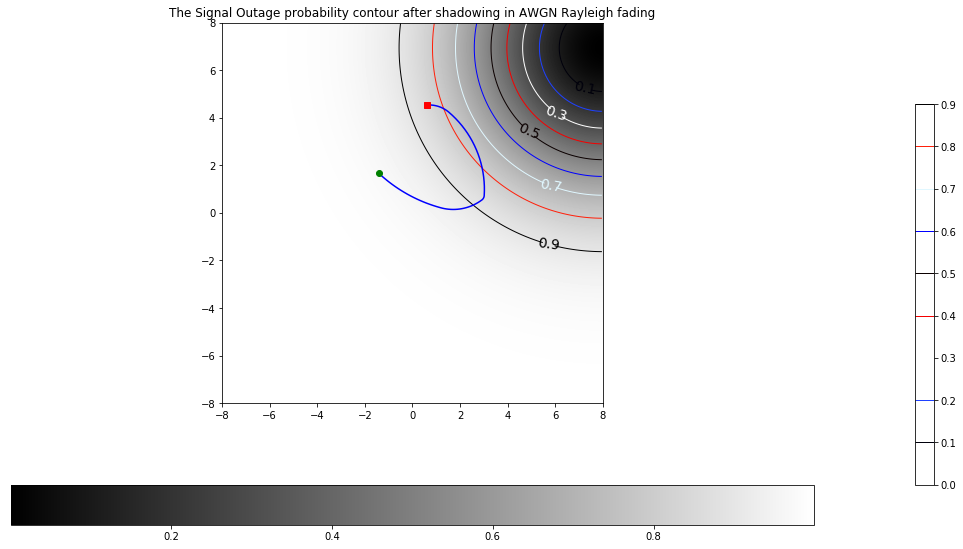

In [57]:
fig, ax = plt.subplots(figsize=(20,10))
im = ax.imshow(Product, interpolation='bilinear', origin='lower',
                cmap=cm.gray, extent=(-8, 8, -8, 8))
levels = np.arange(np.min(Product), np.max(Product), (np.max(Product)-np.min(Product))/10)
CS = ax.contour(Product, levels, origin='lower', cmap='flag',
                linewidths=1, extent=(-8, 8, -8, 8))

# Thicken the zero contour.
zc = CS.collections[6]
plt.setp(zc, linewidth=1)

ax.clabel(CS, levels[1::2],  # label every second level
          inline=1, fmt='%1.1f', fontsize=14)

# make a colorbar for the contour lines
CB = fig.colorbar(CS, shrink=0.7, extend='both')


ax.set_title('The Signal Outage probability contour after shadowing in AWGN Rayleigh fading')

# We can still add a colorbar for the image, too.
CBI = fig.colorbar(im, orientation='horizontal', shrink=0.9)

plt.plot(X_car[:,0],X_car[:,1],'b')
plt.plot(X_car[0,0],X_car[0,1],'go')
plt.plot(X_car[-1,0],X_car[-1,1],'rs')
plt.gca().set_aspect('equal')
plt.show()

In [58]:
print(Pout3)

[[5.07146516e-07 3.93717841e-07 3.06757771e-07 ... 2.66415049e-07
  3.41237674e-07 4.38647609e-07]
 [4.13898091e-07 3.22942126e-07 2.53399564e-07 ... 2.21168792e-07
  2.80958185e-07 3.58932650e-07]
 [3.34529949e-07 2.62286689e-07 2.07262819e-07 ... 1.81805267e-07
  2.29049125e-07 2.90832406e-07]
 ...
 [2.94672221e-07 2.31660341e-07 1.83804935e-07 ... 1.61696142e-07
  2.02740038e-07 2.56532906e-07]
 [3.66974926e-07 2.87132752e-07 2.26211167e-07 ... 1.98000819e-07
  2.50342643e-07 3.18701833e-07]
 [4.52036975e-07 3.51948078e-07 2.75324892e-07 ... 2.39794830e-07
  3.05697589e-07 3.91571685e-07]]


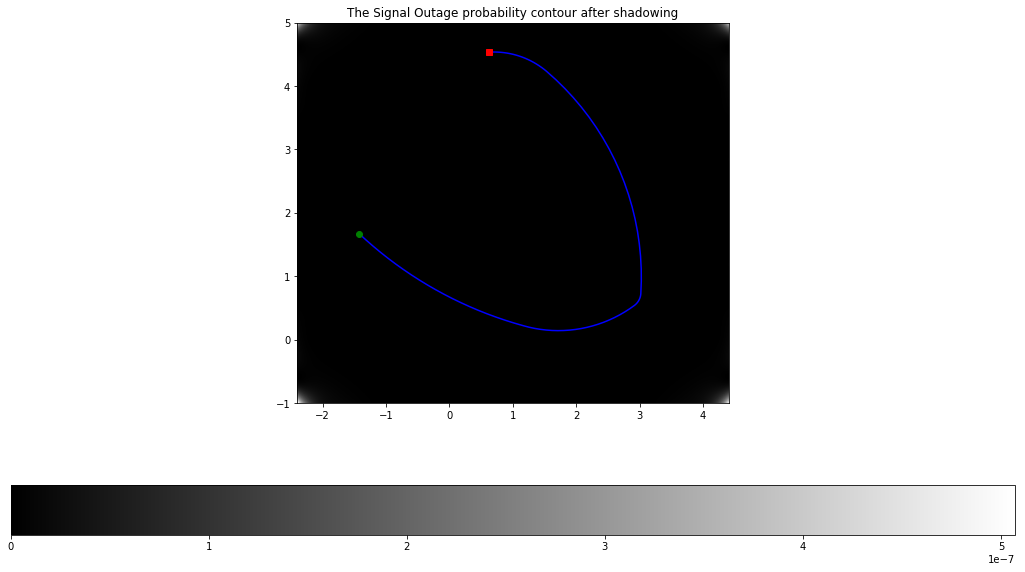

In [59]:
fig, ax = plt.subplots(figsize=(20,10))
im = ax.imshow(Pout3, interpolation='bilinear', origin='lower',
                cmap=cm.gray, extent=(-2.4, 4.4, -1, 5))
levels = np.arange(np.min(Pout3), np.max(Pout3), (np.max(Pout3)-np.min(Pout3))/8)

ax.set_title('The Signal Outage probability contour after shadowing')

# We can still add a colorbar for the image, too.
CBI = fig.colorbar(im, orientation='horizontal', shrink=0.9)

plt.plot(X_car[:,0],X_car[:,1],'b')
plt.plot(X_car[0,0],X_car[0,1],'go')
plt.plot(X_car[-1,0],X_car[-1,1],'rs')
plt.gca().set_aspect('equal')
plt.show()